Iniziamo abilitando subito l'estensione `autoreload`

In [1]:
%load_ext autoreload
%autoreload 2

# Equazioni Differenziali Ordinarie

## Old News

**Un paio di anni fa, questi signori hanno vinto un premio Nobel**

<center>
<img src="assets/nobel.jpg" width=60%/>
</center>

Sono Michael Rosbash, Jeffrey C. Hall, and Michael W. Young

## Ritmo Circadiano

**Ma cosa hanno scoperto?**

Hanno identificato i meccanismi fondamentali dietro il _ritmo circadiano_

* Il ritmo circadiano è il nostro "orologio biologico"
* Ha un periodo di circa 24 ore (circa-diem)
* Può adattarsi a segnali esterni (e.g. luce)

**Più in dettaglio, come funziona?**

* Una proteina "X" si accumula durante la notte...
* ...E viene smaltita durante il giorno

Si tratta di una reazione è autocatalitica!

* La proteina "X" è _contemporaneamente un reagente ed un prodotto_
* ..In particolare, inibisce la propria produzione

## Oscillatore di Van der Pol

**Il ritmo circadiano è un esempio di _oscillatore biologico_**

* Le vere reazioni che lo caratterizzano sono complesse...
* ...Ma un modello semplificato è alla nostra portata!

**L'Oscillatore di Van der Polè descritto dall'equazione differenziale:**

$$
\begin{align}
  \dot{x} &= y \\
  \dot{y} &= \mu (1 - x^2)y - x \\
\end{align}
$$

* $x$ è la corrisponde alla proteina, $y$ è ausiliaria
* $x$ e $y$ _cambiano nel tempo_ (i.e. sono funzioni)
* L'equazione ci dice come avviene tale cambiamento
* ...Specificando il gradiente delle due funzioni

## Sistemi Dinamici Continui

**Prima di andare nel panico, proviamo a vederla così:**

$$
\begin{align}
\dot{x} &= y \\
  \dot{y} &= \mu (1 - x^2)y - x \\
\end{align}
$$

* $x$ e $y$ descrivono lo stato del sistema
* Tale stato varia nel tempo

Si tratta di un sistema dinamico!

* Stavolta però lo stato varia in modo continuo nel tempo
* Le derivate ci dicono in che direzione e con quale intensità

> **Una equazione differenziale descrive un sistema dinamico _continuo_**

## Equazioni Differenziali Ordinarie

**Si chiama _Equazione Differenziale Ordinarie (Ordinary Differential Equation)_**

...Una equazione nella forma:

$$\dot{x} = f(x, t)$$

* $x$ rappresenta lo stato del sistema, che cambia rispetto alla variabile $t$
  - I.e. è una funzione (vettoriale) nella forma $x(t)$
  - $t$ rappresenta di solito (ma non sempre) il tempo
* $f$ definisce il gradiente di $x$
  - Può dipendere sia dallo stato corrente che dal tempo

**Si chiama "ordinaria" perché $x$ dipende da una variabile scalare**

* Se $t$ è vettoriale, allora si parla di Equazione Differenziale alle Derivate Parziali
* Noi ci limiteremo a trattare le ODE

## Problema ai Valori Iniziali

**Quando si risolve una ODE, l'obiettivo è determinare `$x$`**

Ma `$x$` è una funzione! Quindi _vogliamo determinarne l'andamento_

* Per farlo, è necessario fare alcune assunzioni addizionali...
* ...Per esempio, possiamo specificare un _valore iniziale_

**In questo modo ottieniamo un problema ai valori inziali:**

`$$\begin{align}
& \dot{x} = f(t, x) \\
& x(0) = x_0
\end{align}$$`

Intuitivamente, si tratta di simulare il sistema dinamico

* Abbiamo già visto qualcosa di simile!
* ...Solo che finora abbiamo discusso solo sistemi dinamici _discreti_

## Metodo di Eulero

**Come possiamo risolvere una ODE?**

$$\dot{x} = f(x, t)$$

* Negli esami di Analisi Matematica si studiano approcci _simbolici_
* Noi vedremo invece come ottenere un metodo _numerici_

**Per prima cosa, dividiamo $t$ in _passi discreti_ di lunghezza $h$**

...Quindi rimpiazziamo $\dot{x}$ con l'approssimazione discreta che abbiamo discusso

$$
\frac{x(t+h) - x(t)}{h} = f(x(t), t)
$$

* Se $h$ è abbastanza piccolo, dovremmo ottenere una buona approssimazione

## Metodo di Eulero

**Poiché abbiamo diviso $t$ in una sequenza discreta $\{t_k\}_{k=0}^n$**

...Ci interessano i valori di $x$ solo in corrispondenza di tali passi

* Quindi possiamo rimpiazzare $x(t)$ con una sequenza di stati $\{x_k\}_{k=0}^n$
* Se $x(t)$ corrisponde a $x_k$, allora $x(t+h)$ corrisponde a $x_{k+1}$

**In questo modo otteniamo**

$$
\frac{x_{k+1} - x_k}{h} = f(x_k, t_k)
$$

E quindi:

$$
x_{k+1} = x_k + h f(x_k, t_k)
$$

**Abbiamo ottenuto un sistema dinamico discreto**

## Metodo di Eulero

**Se i passi discreti non hanno lunghezza uniforme**

...La nostra relazione vale ancora sostituendo $h$ con $t_{k+1} - t_k$:

$$
x_{k+1} = x_k + (t_{k+1} - t_k) f(x_k, t_k)
$$

**Possiamo ora risolvere il problema come nel caso discreto**

...Ossia con un algoritmo del tipo:

* $\text{parametri: } f, x_0, \{t_k\}_{k=0}^n$
* $\text{for } k = \{1..n\}$:
  - $x_{k} = x_{k1} + (t_{k} - t_{k-1}) f(x_{k-1}, t_{k-1})$
  
Uno dei parametri di ingresso è la funzione $f$!

**Questo algoritmo è noto come _metodo di Eulero_**

## Una Possibile Implementazione

**Proviamo ad implementare il metodo**

In [2]:
def euler(f, x0, t):
    X = [x0]
    for k in range(1, len(t)):
        nX = X[k-1] + (t[k] - t[k-1]) * f(X[k-1], t[k-1])
        X.append(nX)
    return np.array(X)

**La nostra implementazione assume che `f` abbia una interfaccia del tipo:**

```python
def f(x, t):
    ...
```

* Lo stato (se c'è più di una componente si usa un vettore)
* Il valore di `t`

**Per il resto `x0` è lo stato iniziale e `t` è una sequenza di valori**

## Una Applicazione sull'Oscillatore

**Proviamo ad applicare il metodo sull'Oscillatore di Van der Pol**

L'oscillatore è descritto dall'ODE:

$$
\begin{align}
  \dot{x} &= y \\
  \dot{y} &= \mu (1 - x^2)y - x \\
\end{align}
$$

In forma vettoriale possiamo vederla come:

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{y}
\end{array}\right)
= f((x, y), t) =
\left(\begin{array}{c}
y \\
\mu (1 - x^2)y - x
\end{array}\right)
$$

* Quindi lo stato è rappresentabile come un vettore con due componenti
* Non c'è in questo caso una dipendenza diretta da $t$

## Una Applicazione sull'Oscillatore

**Definiamo la funzione $f$**

In [3]:
def vdp_dstate(state, t):
    mu = 1
    x, y = state # "spacchetto" lo stato
    dx = y
    dy = mu * (1 - x**2) * y - x
    return np.array([dx, dy])

* Assumiamo che lo stato sia passato come un array `state`
* Usiamo l'unpacking per separare $x$ ed $y$ (per chiarezza)
* Calcoliamo le derivate delle due componenti
* Restituiamo un vettore con le due derivate

## Una Applicazione sull'Oscillatore

**Ora possiamo risolvere l'ODE**

In [4]:
import numpy as np

X0 = np.array([1, 1])
t = np.linspace(0, 45, 1000)

X = euler(vdp_dstate, X0, t)
print(X[:4, :])

[[1.         1.        ]
 [1.04504505 0.95495495]
 [1.08806103 0.90391826]
 [1.12877807 0.84741958]]


* Come stato iniziale abbiamo $(x, y) = (1, 1)$
* $t$ rappresenta il tempo prende valori (equaspaziati) in $[0, 45]$
* Il risultato `X` è un array con una colonna per ogni componente dello stato
* ...Ed una riga per ogni valutazione effettuata

## Una Applicazione sull'Oscillatore

**Possiamo disegnare l'evoluzione dello stato nel tempo**

Usiamo la funzione `example.util.plot_state_evolution`

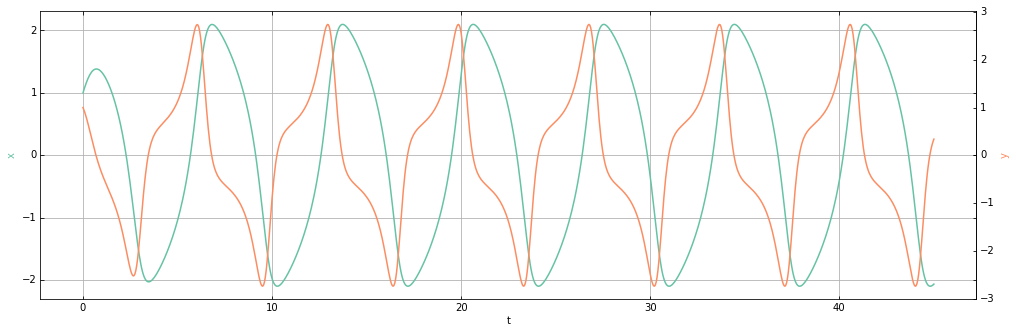

In [5]:
from example import util

util.plot_state_evolution(X, t, figsize=(20, 5), xlabel='t', ylabels=['x', 'y'])

* `X` e `t` sono quelli della nostra funzione `euler`
* La funzione richiede una etichetta `y` per ogni componente dello stato

## Utilizzare il Risolutore di `numpy`

**Quello di Eulero è il metodo più semplice per risolvere le ODE**

...Ma è anche il meno accurato. Ci sono altri metodi!

* E.g. metodo di Eulero inverso, metodi di Runge-Kutta...

**Come al solito, non c'è bisogno di re-implementarli**

Un buon risolutore di ODE è disponibile nel [pacchetto scipy](https://scipy.org/)

* Il pacchetto `scipy` estende `numpy` con ulteriori algorimi
* È preinstallato in Anaconda base
* ...Ed installabile su altre distribuzioni (e.g. con `pip install scipy`)

**La funzione che ci interessa è [scipy.intetrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

...Ed può essere invocata come la nostra `euler`

## Utilizzo di `odeint`

**Vediamo un esempio di invocazione di `odeint`**

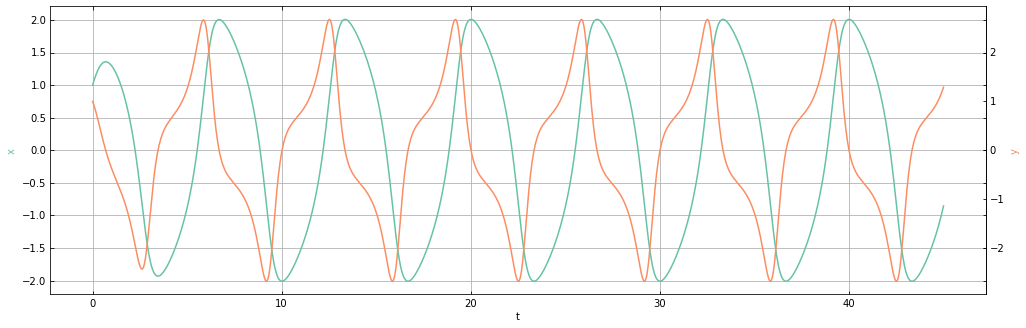

In [6]:
from scipy.integrate import odeint
X = odeint(vdp_dstate, X0, t)
util.plot_state_evolution(X, t, figsize=(20, 5), xlabel='t', ylabels=['x', 'y'])

* I risultati sono gli stessi di prima (un po' meglio, in realtà!)
* Il comportamento (come previsto) è periodico

**Negli esercizi, useremo sempre `odeint`**

## Valutazione della Funzione Risultato

**Diamo un'altra occhiata ai risultati (sia di `euler` che `odeint`)**

Abbiamo accesso ai valori di $\{t_k\}_{k=0}^n$

In [7]:
print(t[:4])

[0.         0.04504505 0.09009009 0.13513514]


...Ed ai valori dello stato corrispondenti

In [8]:
print(X[:4, :])

[[1.         1.        ]
 [1.04398574 0.95199307]
 [1.08568168 0.89843058]
 [1.12485152 0.83994828]]


**Ma se ci interessa il valore dello stato per un $t$ compreso tra $t_k$ e $t_{k+1}$?**

## Valutazione della Funzione Risultato

**Possiamo usare una semplice _interpolazione lineare_**

...Cioè prendiamo i valori sulla linea tra $(x_k, t_k)$ e $(x_{k+1}, t_{k+1})$

* È la stessa tecnica che usiamo per disegnare le funzioni!
* ...Ed è disponibile attraverso la funzione [numpy.interp](https://numpy.org/doc/stable/reference/generated/numpy.interp.html)

**Vediamo un esempio:**

La nostra soluzione contiene 1,000 valori per $t$ ed $X$:

In [9]:
print(t.shape, X.shape)

(1000,) (1000, 2)


Recuperiamo 10,000 valori utilizzano l'interpolazione lineare:

In [10]:
ts = np.linspace(0, 45, 10000)
xs = np.interp(ts, t, X[:, 0])

## Valutazione della Funzione Risultato

**Cerchiamo di capire meglio l'ultima invocazione**

In [11]:
ts = np.linspace(0, 45, 10000)
xs = np.interp(ts, t, X[:, 0])

* `t` contiene il valore di $t$ per i punti noti
* `X[:, 0]` è il valore della componente $x$ per i punti noti
* `ts` contiene i valori di $t$ per cui vogliamo valutare l'interpolazione

Stampiamo i primi elementi dell'array risultato:

In [12]:
print(xs[:5])

[1.         1.00439461 1.00878923 1.01318384 1.01757846]


**NOTA:** `interp` richiede che l'array alle ascisse sia _ordinato in modo crescente_

## Parametri Addizionali nelle ODE

**Torniamo a guarda la nostra funzione `vdp_dstate`**

```python
def vdp_dstate(state, t):
    mu = 1
    x, y = state
    dx = y
    dy = mu * (1 - x**2) * y - x
    return np.array([dx, dy])
```

* Il nostro codice assume che $\mu = 1$.
* Ma se volessimo usare un valore diverso?

**Potremmo modificarlo direttamente nel codice**

* Per una o due prove va benissimo
* Ma _non se volessimo provare 100 valori di $\mu$ diversi_!

## Parametri Addizionali nelle ODE

**Potremmo aggiungere $\mu$ come parametro di ingresso**

```python
def vdp_dstate(state, t, mu):
    x, y = state
    dx = y
    dy = mu * (1 - x**2) * y - x
    return np.array([dx, dy])
```

* Questa soluzione si presta ad essere automatizzata
* ...Ma _non è compatibile con `odeint`_ che si aspetta solo due parametri per $f$

## Parametri Addizionali nelle ODE

**Possiamo definire _una classe eseguibile_**

In [92]:
class VdpDstate:
    def __init__(self, mu):
        self.mu = mu
    
    def __call__(self, state, t):
        mu = self.mu # recupero mu dall'istanza corrente
        x, y = state
        dx = y
        dy = mu * (1 - x**2) * y - x
        return np.array([dx, dy])

* Questa soluzione si presta a fare esperimenti automatici
* ...Ed è compatibile con `odeint`, perché al momento della chiamata
* ...Vanno passati solo i parametri `X` e `t`

## Parametri Addizionali nelle ODE

**Vediamo un esempio di utilizzo**

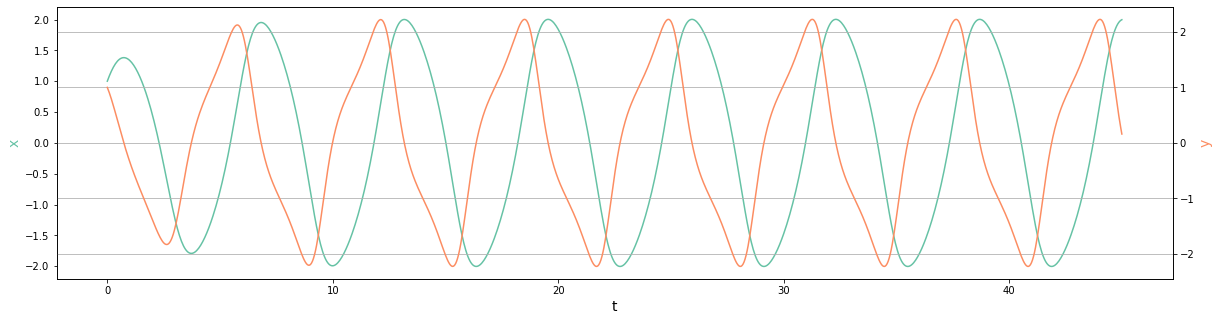

In [97]:
f = VdpDstate(mu=0.5)
X = odeint(f, X0, t)
util.plot_state_evolution(X, t, figsize=(20, 5), xlabel='t', ylabels=['x', 'y'])